In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

Created WidebandSignal with 1.0 MHz total bandwidth and 10000 samples per step


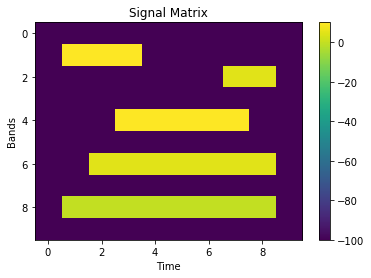

In [2]:
length = .1 # in seconds

wbs = ss.WidebandSignal(t_sec=length, num_bands=10, num_steps=10)

# You create the matrix with the time axis being vertical and the bands horizontal.
# Most of the plots later on will rotate the matrix 90 degree counter clockwise.
mat = np.array([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100],
                [-100,    0, -100, -100, -100, -100, -100, -100,   10, -100],
                [-100,    0, -100,    5, -100, -100, -100, -100,   10, -100],
                [-100,    0, -100,    5, -100,   10, -100, -100,   10, -100],
                [-100,    0, -100,    5, -100,   10, -100, -100, -100, -100],
                [-100,    0, -100,    5, -100,   10, -100, -100, -100, -100],
                [-100,    0, -100,    5, -100,   10, -100, -100, -100, -100],
                [-100,    0, -100,    5, -100,   10, -100,    5, -100, -100],
                [-100,    0, -100,    5, -100, -100, -100,    5, -100, -100],
                [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]])

# Plot the matrix
plt.imshow(np.rot90(mat, 1), aspect='auto')
plt.title("Signal Matrix")
plt.xlabel("Time")
plt.ylabel("Bands")
plt.colorbar()
plt.show()

sig, sample_freq = wbs.get_signal(mat)

wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.get_signal(power=10., dB=True)

assert wbs.num_samples == wgn.num_samples
num_samples = wbs.num_samples

both = sig + noise

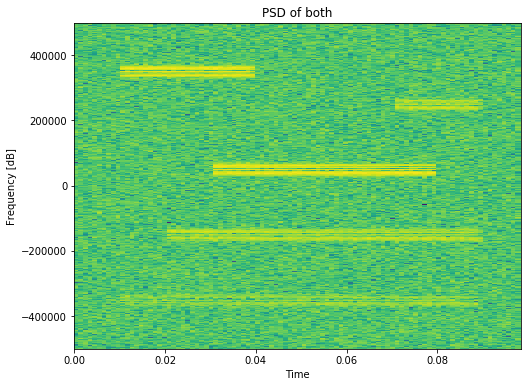

In [3]:
# Plot the wideband signal in 2d
ss.plot2d(both,
          sample_freq,
          window='flattop',
          nfft=1024,
          dB=True,
          type='our',
          title='both')

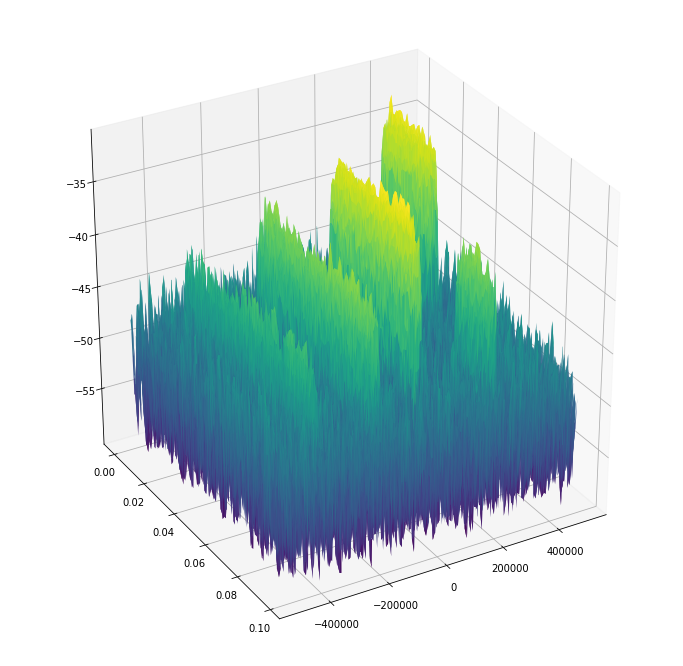

In [4]:
ss.plot3d(sig=both,
          f_sample=sample_freq,
          window='flattop',
          nfft=1024,
          clip=-60,
          smooth=.5,
          crop=None,
          elev=30,
          azim=60)